### Examples of Code Usage and Main Plotting Functions

In [1]:
using Plots #for plotting 

In [2]:
#path setup
mainDir = joinpath("/",split(abspath(""),"/")[1:findlast("network-epi" .== split(abspath(""),"/"))]...)

"/scratch2/dgleich/network-epi/p/mnt/scratch/network-epi"

In [3]:
#handle data loading from SMAT
include(joinpath(mainDir,"code","graph-io.jl"))

#main epidemic code
include(joinpath(mainDir,"code","fast-diffusion.jl"))

stratified_nodesample (generic function with 1 method)

#### Running a single diffusion

In [4]:
#load test graph 
gname = "study-20-draft-150.smat"
gpath = joinpath(mainDir,"input/graphs/")

A = loadGraph(gname,gpath);
nnodes = size(A,1)

println("nnodes: $nnodes\nnedges: $(nnz(A))")

nnodes: 500
nedges: 5258


In [5]:
#convert graph into EventEpidemic data structures (SIRData,SEIRData)
#can also specify other parameters such as beta,gamma, etc
E = EventEpidemic.SEIRData(A);

In [6]:
#epidemics are specified from a single seed node
patient_zero = rand(1:nnodes)
l,E = EventEpidemic.epidemic(E,patient_zero);

In [7]:
#compute relvent statistics 
println("total susceptible node: $(sum(E.snodes))")
println("total infections (method 1): $(nnodes-sum(E.snodes))")
println("total infections (method 2): $(sum(E.itime.<l))")
println("total infections (method 3): $(sum(E.ctime.<l))")
println("total recovered: $(sum(E.rtime.<=l))")

total susceptible node: 2
total infections (method 1): 498
total infections (method 2): 498
total infections (method 3): 498


total recovered: 498


In [8]:
#plot infections over time
net_infections,new_infections = EventEpidemic.get_infdata(l,E,method="ctime")

#net_infections represents the change in number of infected at each time step
#new_infections represents only the new infections at each time step

([1, 0, 1, 0, 0, 0, 0, 1, 0, 2  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 1, 0, 2  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

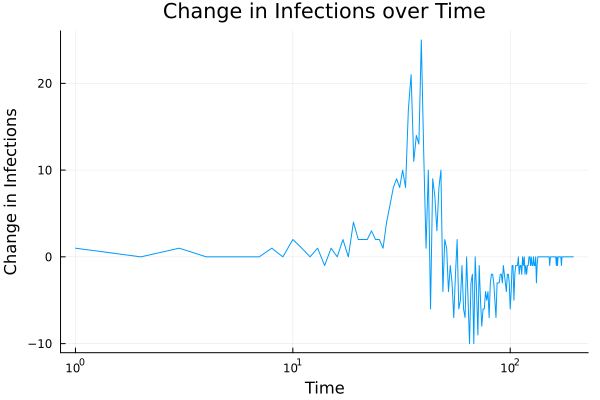

In [9]:
Plots.plot(net_infections,leg=false,xscale=:log10,
        title="Change in Infections over Time",
        xlabel="Time",
        ylabel="Change in Infections")

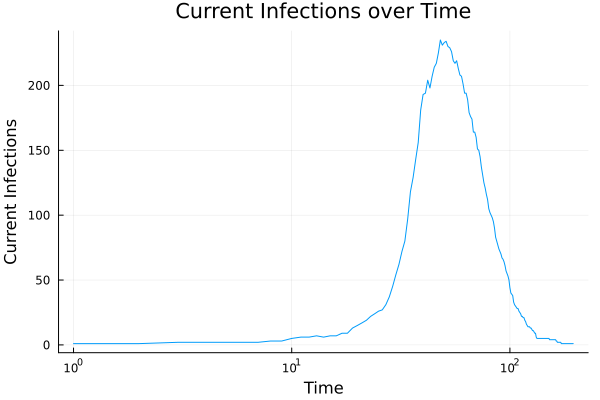

In [10]:
#current infections over time 
curr_infs = cumsum(net_infections)

Plots.plot(curr_infs,xscale=:log10,leg=false,
            title="Current Infections over Time",
            xlabel="Time",
            ylabel="Current Infections")

In [65]:
#making State plot by time 

#record deltas 
sdelta = zeros(l+1) #susceptible
edelta = zeros(l+1) #exposed 
idelta = zeros(l+1) #contagious
rdelta = zeros(l+1) #recovery time 


for node=1:nnodes
    if !E.snodes[node] #only track nodes that were actually infected
        exposed_time = E.itime[node]+1
        contagious_time = E.ctime[node]+1
        recovered_time = E.rtime[node]+1

        sdelta[exposed_time]-=1
        edelta[exposed_time]+=1

        edelta[contagious_time]-=1
        idelta[contagious_time]+=1

        idelta[recovered_time]-=1
        rdelta[recovered_time]+=1
    end
end

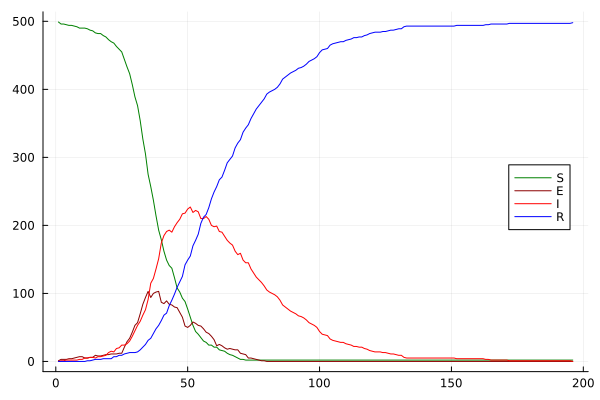

In [102]:
scurr = cumsum(sdelta).+nnodes

f = plot(scurr,label="S",c=:green)
plot!(f,cumsum(edelta),label="E",c=:darkred)
plot!(f,cumsum(idelta),label="I",c=:red)
plot!(f,cumsum(rdelta),label="R",leg=:right,c=:blue)

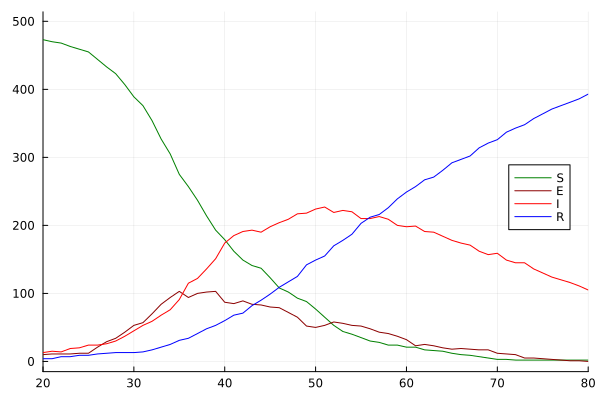

In [107]:
#zoom in on important region
xlims!(f,(20,80))